<a href="https://colab.research.google.com/github/daeunknown/deeplearning-2022-summer/blob/main/8_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np

In [ ]:
def im2col(image, flt_h, flt_w, out_h, out_w):
    img_h, img_w = image.shape
    
    cols = np.zeros((flt_h * flt_w, out_h * out_w))
    
    for h in range(out_h):
        h_lim = h + flt_h
        for w in range(out_w):
            w_lim = w + flt_w
            cols[:, h * out_w + w] = image[h : h_lim, w: w_lim].reshape(-1)
            
    return cols

In [ ]:
#간단한 im2col 구현

img = np.array([[1, 2, 3, 4],
               [5, 6, 7, 8],
               [9, 10, 11, 12],
               [13, 14, 15, 16]])

cols = im2col(img, 2, 2, 3, 3)
print(cols)

[[ 1.  2.  3.  5.  6.  7.  9. 10. 11.]
 [ 2.  3.  4.  6.  7.  8. 10. 11. 12.]
 [ 5.  6.  7.  9. 10. 11. 13. 14. 15.]
 [ 6.  7.  8. 10. 11. 12. 14. 15. 16.]]


In [ ]:
#수정된 im2col

def im2col(image, flt_h, flt_w, out_h, out_w):
    img_h, img_w = image.shape
    
    cols = np.zeros((flt_h * flt_w, out_h * out_w))
    
    for h in range(flt_h):
        h_lim = h + flt_h
        for w in range(out_w):
            w_lim = w + flt_w
            cols[:, h * out_w + w] = image[h : h_lim, w: w_lim].reshape(-1)
            
    return cols

In [ ]:
#실전 im2col

def im2col(image, flt_h, flt_w, out_h, out_w):
    n_bt, n_ch, img_h, img_w = image.shape
    
    cols = np.zeros((n_bt, n_ch, flt_h, flt_w, out_h, out_w))
    
    for h in range(flt_h):
        h_lim = h + out_h
        for w in range(flt_w):
            w_lim = w + out_w
            cols[:, :, h, w, :, :] = images[:, :, h:h_lim, w:w_lim]
            
        cols = cols.transpose(1, 2, 3, 0, 4, 5).reshape(n_ch*flt_h*flt_w, n_bt*out_h*out_w)
        
        return cols

In [ ]:
# 패딩과 스트라이드를 고려한 im2col 함수

def im2col(image, flt_h, flt_w, out_h, out_w):
    n_bt, n_ch, img_h, img_w = image.shape
    
    img_pad = np.pad(images, [(0,0), (0,0), (pad,pad), (pad,pad)], "constant")
    cols = np.zeros((n_bt, n_ch, flt_h, flt_w, out_h, out_w))
    
    for h in range(flt_h):
        h_lim = h + stride * out_h
        for w in range(flt_w):
            w_lim = w + stride * out_w
            cols[:, :, h, w, :, :] = images[:, :, h:h_lim:stride, w:w_lim:stride]
            
        cols = cols.transpose(1, 2, 3, 0, 4, 5).reshape(n_ch*flt_h*flt_w, n_bt*out_h*out_w)
        
        return cols

In [ ]:
def col2im(cols, img_shape, flt_h, flt_w, out_h, out_w, stride, pad):
    
    n_bt, n_ch, img_h, img_w = img_shape
    
    cols = cols.reshape(n_ch, flt_h, flt_w, n_bt, out_h, out_w).transpose(3, 0, 1, 2, 4, 5)
    images = np.zeros((n_bt, n_ch, img_h + 2*pad + stride -1, img_w + 2*pad + stride -1))
    
    for h in range(flt_h):
        h_lim = h + stride * out_h
        for w in range(flt_w):
            w_lim = w + stride * out_w
            images[:, :, h:h_lim:stride, w:w_lim:stride] += cols[:, :, h, w, :, :]
            
    return images[:, :, pad:img_h + pad, pad:img_w+pad]    

In [ ]:
cols = np.ones((4, 4))
img_shape = (1, 1, 3, 3)
images = col2im(cols, img_shape, 2, 2, 2, 2, 1, 0)
print(images)

[[[[1. 2. 1.]
   [2. 4. 2.]
   [1. 2. 1.]]]]


In [ ]:
class ConvLayer:
    
    def __init__(self, x_ch, x_h, x_w, n_flt, flt_h, flt_w, stride, pad):
        self.params = (x_ch, x_h, x_w, n_flt, flt_h, flt_w, stride, pad)
        
        self.w = wb_width * np.random.randn(n_flt, x_ch, flt_h, flt_w)
        self.b = wb_width * np.random.randn(1, n_flt)
        
        self.y_ch = n_flt
        self.y_h = (x_h - flt_h + 2*pad) // stride + 1
        self.y_w = (x_w - flt_w + 2*pad) // stride + 1

In [ ]:
def forward(self, x):
    n_bt = x.shape[0]
    x_ch, x_h, x_w, n_flt, flt_h, flt_w, stride, pad = self.params
    y_ch, y_h, y_w = self.y_ch, self.y_h, self.y_w
    
    self.cols = im2col(x, flt_h, flt_w, y_h, y_w, stride, pad)
    self.w_col = self.w.reshape(n_flt, x_ch*flt_h*flt_w)
    
    u = np.dot(self.w_col, self.cols).T + self.b
    self.u = u.reshape(n_bt, y_h, y_w, y_ch).transpose(0, 3, 1, 2)
    self.y = np.where(self.u <= 0, 0, self.u)

In [ ]:
def backward(self, grad_y):
    n_bt = grad_y.shape[0]
    x_ch, x_h, x_w, n_flt, flt_h, flt_w, stride, pad = self.params
    y_ch, y_h, y_w = self.y_ch, self.y_h, self.y_w
    
    delta = grad_y * np.where(self.u <= 0, 0, 1)
    delta = delta.transpose(0, 2, 3, 1).reshape(n_bt*y_h*y_w, y_ch)
    
    grad_w = np.dot(self.cols, delta)
    self.grad_w = grad_w.T.reshape(n_flt, x_ch, flt_h, flt_w)
    self.grad_b = np.sum(delta, axis = 0)
    
    grad_cols = np.dot(delta, self.w_col)
    x_shape = (n_bt, x_ch, x_h, x_w)
    self.grad_x = col2im(grad_cols.T, x_shape, flt_h, flt_w, y_h, y_w, stride, pad)

In [ ]:
class PoolingLayer:
    
    def __init__(self, x_ch, x_h, x_w, pool, pad):
        self.params = (x_ch, x_h, x_w, pool, pad)
        
        self.y_ch = x_ch
        self.y_h = x_h // pool if x_h%pool == 0 else x_h//pool+1
        self.y_w = x_w // pool if x_w%pool == 0 else x_w//pool+1

In [ ]:
def forward(self, x):
    n_bt = x.shape[0]
    x_ch, x_h, x_w, pool, pad = self.params
    y_ch, y_h, y_w = self.y_ch, self.y_h, self.y_w
    
    cols = im2col(x, pool, pool, y_h, y_w, pool, pad)
    cols = cols.T.reshape(n_bt*y_h*y_w*x_ch, pool*pool)
    
    y = np.max(cols, axis=1)
    self.y = y.reshape(n_bt, y_h, y_w, x_ch).transpose(0, 3, 1, 2)
    
    self.max_index = np.argmax(cols, axis=1)

In [ ]:
def backward(self, grad_y):
    n_bt = grad_y.shape[0]
    x_ch, x_h, x_w, pool, pad = self.params
    y_ch, y_h, y_w = self.y_ch, self.y_h, self.y_w
    
    grad_y = grad_y.transpose(0, 2, 3, 1)
    
    grad_cols = np.zeros((pool*pool, grad_y.size))
    grad_cols[self.max_index.reshape(-1), np.arange(grad_y.size)] = grad_y.reshape(-1)
    grad_cols = grad_cols.reshape(p00l, pool, n_bt, y_h, y_w, y_ch)
    grad_cols = grad_cols.transpose(5, 0, 1, 2, 3, 4)
    grad_cols = grad_cols.reshape(y_ch*pool*pool, n_bt*y_h*y_w)
    
    x_shape = (n_bt, x_ch, x_h, x_w)
    self.grad_x = col2im(grad_cols, x_shape, pool, pool, y_h, y_w, pool, pool)

(1797, 64)


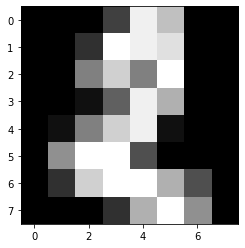

In [ ]:
import matplotlib.pyplot as plt
from sklearn import datasets

digits = datasets.load_digits()
print(digits.data.shape)

plt.imshow(digits.data[2].reshape(8, 8), cmap = "gray")
plt.show()

In [ ]:
# p.319 전체 모형 구축하기
digits_data = datasets.load_digits()
input_data = digits_data.data
correct = digits_data.target
n_data = len(correct)

ave_input = np.average(input_data)
std_input = np.std(input_data)
input_data = (input_data - ave_input) / std_input

correct_data = np.zeros((n_data, 10))
for i in range(n_data):
    correct_data[i, correct[i]] = 1.0
    
index = np.arange(n_data)
index_train = index[index%3 != 0]
index_test = index[index%3 == 0]

input_train = input_data[index_train, :]
correct_train = correct_data[index_train, :]
input_test = input_data[index_test, :]
correct_test = correct_data[index_test, :]

n_train = input_train.shape[0]
n_test = input_test.shape[0]

img_h = 8
img_w = 8
img_ch = 1

wb_width = 0.1
eta = 0.01
epoch = 50
batch_size = 8
interval = 10
n_sample = 200


def im2col(image, flt_h, flt_w, out_h, out_w, stride, pad):
    n_bt, n_ch, img_h, img_w = image.shape
    
    img_pad = np.pad(images, [(0,0), (0,0), (pad,pad), (pad,pad)], "constant")
    cols = np.zeros((n_bt, n_ch, flt_h, flt_w, out_h, out_w))
    
    for h in range(flt_h):
        h_lim = h + stride * out_h
        for w in range(flt_w):
            w_lim = w + stride * out_w
            cols[:, :, h, w, :, :] = images[:, :, h:h_lim:stride, w:w_lim:stride]
            
    cols = cols.transpose(1, 2, 3, 0, 4, 5).reshape(n_ch*flt_h*flt_w, n_bt*out_h*out_w)
        
    return cols

def col2im(cols, img_shape, flt_h, flt_w, out_h, out_w, stride, pad):
    
    n_bt, n_ch, img_h, img_w = img_shape
    
    cols = cols.reshape(n_ch, flt_h, flt_w, n_bt, out_h, out_w).transpose(3, 0, 1, 2, 4, 5)
    images = np.zeros((n_bt, n_ch, img_h + 2*pad + stride -1, img_w + 2*pad + stride -1))
    
    for h in range(flt_h):
        h_lim = h + stride * out_h
        for w in range(flt_w):
            w_lim = w + stride * out_w
            images[:, :, h:h_lim:stride, w:w_lim:stride] += cols[:, :, h, w, :, :]
            
    return images[:, :, pad:img_h + pad, pad:img_w+pad]    

class ConvLayer:
    
    def __init__(self, x_ch, x_h, x_w, n_flt, flt_h, flt_w, stride, pad):
        self.params = (x_ch, x_h, x_w, n_flt, flt_h, flt_w, stride, pad)
        
        self.w = wb_width * np.random.randn(n_flt, x_ch, flt_h, flt_w)
        self.b = wb_width * np.random.randn(1, n_flt)
        
        self.y_ch = n_flt
        self.y_h = (x_h - flt_h + 2*pad) // stride + 1
        self.y_w = (x_w - flt_w + 2*pad) // stride + 1
        
        self.h_w = np.zeros((n_flt, x_ch, flt_h, flt_w)) + 1e-8
        self.h_b = np.zeros((1, n_flt)) +1e-8
        
    def forward(self, x):
        n_bt = x.shape[0]
        x_ch, x_h, x_w, n_flt, flt_h, flt_w, stride, pad = self.params
        y_ch, y_h, y_w = self.y_ch, self.y_h, self.y_w
    
        self.cols = im2col(x, flt_h, flt_w, y_h, y_w, stride, pad)
        self.w_col = self.w.reshape(n_flt, x_ch*flt_h*flt_w)
    
        u = np.dot(self.w_col, self.cols).T + self.b
        self.u = u.reshape(n_bt, y_h, y_w, y_ch).transpose(0, 3, 1, 2)
        self.y = np.where(self.u <= 0, 0, self.u)
        
    def backward(self, grad_y):
        n_bt = grad_y.shape[0]
        x_ch, x_h, x_w, n_flt, flt_h, flt_w, stride, pad = self.params
        y_ch, y_h, y_w = self.y_ch, self.y_h, self.y_w
    
        delta = grad_y * np.where(self.u <= 0, 0, 1)
        delta = delta.transpose(0, 2, 3, 1).reshape(n_bt*y_h*y_w, y_ch)
    
        grad_w = np.dot(self.cols, delta)
        self.grad_w = grad_w.T.reshape(n_flt, x_ch, flt_h, flt_w)
        self.grad_b = np.sum(delta, axis = 0)
    
        grad_cols = np.dot(delta, self.w_col)
        x_shape = (n_bt, x_ch, x_h, x_w)
        self.grad_x = col2im(grad_cols.T, x_shape, flt_h, flt_w, y_h, y_w, stride, pad)
        
    def update(self, eta):
        self.h_w += self.grad_w * self.grad_w
        self.w -= eta / np.sqrt(self.h_w) * self.grad_w
        self.h_b += self.grad_b * self.grad_b
        self.b -= eta / np.sqrt(self.h_b) * self.grad_b
        
class PoolingLayer:
    
    def __init__(self, x_ch, x_h, x_w, pool, pad):
        self.params = (x_ch, x_h, x_w, pool, pad)
        
        self.y_ch = x_ch
        self.y_h = x_h // pool if x_h%pool == 0 else x_h // pool+1
        self.y_w = x_w // pool if x_w%pool == 0 else x_w // pool+1
        
